pip install tqdm
pip install pillow
pip install image
pip install keras
pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

# Load data and preprocessing

In [2]:
train_dataset = pd.read_csv('../../plant-pathology-2020-fgvc7/train.csv')
test_dataset = pd.read_csv('../../plant-pathology-2020-fgvc7/test.csv')

In [3]:
print("-----------------------TRAIN-------------------------- \n :",train_dataset.head())
print("\n Shape : ",train_dataset.shape)

-----------------------TRAIN-------------------------- 
 :   image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

 Shape :  (1821, 5)


In [4]:
print("-----------------------TEST-------------------------- \n :",test_dataset.head())
print("\n Shape : ",test_dataset.shape)

-----------------------TEST-------------------------- 
 :   image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

 Shape :  (1821, 1)


In [5]:
train_dataset.describe()

healthy  multiple_diseases         rust         scab
count  1821.000000        1821.000000  1821.000000  1821.000000
mean      0.283361           0.049973     0.341571     0.325096
std       0.450754           0.217948     0.474367     0.468539
min       0.000000           0.000000     0.000000     0.000000
25%       0.000000           0.000000     0.000000     0.000000
50%       0.000000           0.000000     0.000000     0.000000
75%       1.000000           0.000000     1.000000     1.000000
max       1.000000           1.000000     1.000000     1.000000

In [6]:
targets = train_dataset[['healthy', 'multiple_diseases', 'rust', 'scab']]

 Split the data into train and validation sets, then take a quick look at their make up.

In [7]:
train, validation = train_test_split(train_dataset, test_size=0.2)

Display a picture

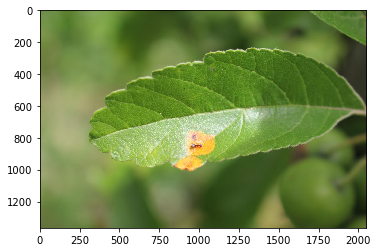

In [8]:
# Retour d'une image de façon aléatoire
randImg = np.random.randint(1820)
img = mpimg.imread(f'../../plant-pathology-2020-fgvc7/images/Train_{randImg}.jpg')
imgplot = plt.imshow(img)

In [9]:
print(train_dataset.shape[0])

1821


On va stocker les images sous formes de données brutes au format LIB

In [10]:
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

size = 64
nb_img = train_dataset.shape[0]
path = '../../plant-pathology-2020-fgvc7/images/'
train_images = np.ndarray(shape=(train_dataset.shape[0], size, size, 3))
test_images = np.ndarray(shape=(test_dataset.shape[0], size, size, 3))

# tqdm pour avoir une barre dévolution
for i in tqdm(range(nb_img)):
  img = load_img(path + f'Train_{i}.jpg', target_size=(size, size))
  train_images[i] = np.float32(img_to_array(img))
    
for i in tqdm(range(nb_img)):
  img = load_img(path + f'Train_{i}.jpg', target_size=(size, size))
  test_images[i] = np.float32(img_to_array(img))

Using TensorFlow backend.


In [11]:
print("Train_images :",train_images.shape)
print("Test_images :",test_images.shape)

Train_images : (1821, 64, 64, 3)
Test_images : (1821, 64, 64, 3)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(train_images, test_images, test_size=0.2)

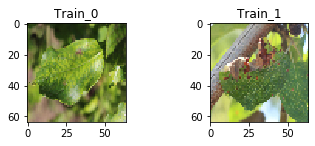

In [17]:
for i in range(2):
	plt.subplot(220 + 1 + i)
	plt.title(train_dataset['image_id'][i])
	plt.imshow(np.uint8(train_images[i]))
plt.show()

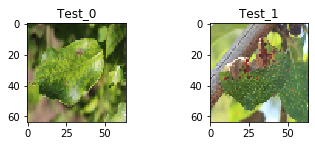

In [18]:
for i in range(2):
	plt.subplot(220 + 1 + i)
	plt.title(test_dataset['image_id'][i])
	plt.imshow(np.uint8(test_images[i]))
plt.show()

In [19]:
from tensorflow.keras.layers import * # Convolution2D, MaxPooling, Flatten, Dense
from tensorflow.keras.models import * # Sequential
from tensorflow.keras.regularizers import * # 
from tensorflow.keras.optimizers import * # 

Préparation des données 

In [21]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow(
    x = x_train, 
    y = y_train
    )

test_set = test_datagen.flow(
    x = x_test,
    y = y_test
    )

## Modèle Linéaire

Structure du modèle Linéaire

In [42]:
class LinearStructurer:

    def __init__(self):
        self.nb_hidden_layers = 0
        self.layers_size = []
        self.use_layers_activation = False
        self.layers_activation = 'relu'
        self.output_activation = 'softmax'
        self.loss = 'sparse_categorical_crossentropy'
        self.optimizer = 'Adam'
        self.metrics = ['categorical_accuracy']

In [38]:
def create_LineareModel(lin_struct: LinearStructurer):
    model = Sequential()
    model.add(Flatten(input_shape=(64, 64, 3)))
    model.add(Dense(4, activation=lin.output_activation))
    model.compile(loss=lin.loss,metrics=lin.metrics)
    
    return model
    

In [48]:
lin = LinearStructurer()
linClassifier = create_LineareModel(lin)

linClassifier.fit(x_train, y_train, batch_size= 100, epochs=10)
# linClassifier.predict()

## Modèle RNN (Lstm)

Structure du LSTM

In [49]:
class Lstm:

    def __init__(self):
        self.name = "lstm"
        self.nb_layers = 3
        self.units = 50
        self.activation = 'tanh'
        self.recurrent_activation = 'sigmoid'
        self.dropout_value = 0.0
        self.kernel_regularizer = None
        self.recurrent_regularizer = None
        self.output_regularizer = None
        self.l1_value = 0.0
        self.l2_value = 0.0
        self.loss = 'sparse_categorical_crossentropy'
        self .optimizer = 'Adam'
        self.metrics = ['sparse_categorical_accuracy']

In [51]:
def create_lstm(lstm_struct: Lstm):

    input_tensor = Input((32, 96))

    lstm_tensor = input_tensor
    for i in range(lstm_struct.nb_layers - 1):
        lstm_tensor = LSTM(units= lstm_struct.units,
                           kernel_regularizer=lstm_struct.kernel_regularizer,
                           recurrent_regularizer=lstm_struct.recurrent_regularizer,
                           dropout=lstm_struct.dropout_value,
                           return_sequences=True
                           )(lstm_tensor)

    lstm_tensor = LSTM(units=lstm_struct.units,
                       kernel_regularizer=lstm_struct.kernel_regularizer,
                       recurrent_regularizer=lstm_struct.recurrent_regularizer,
                       dropout=lstm_struct.dropout_value,
                       return_sequences=False
                       )(lstm_tensor)

    output_tensor = Dense(10, activation=lstm_struct.output_activation, kernel_regularizer=lstm_struct.output_regularizer)(lstm_tensor)

    model = Model(input_tensor, output_tensor)

    model.compile(loss=lstm_struct.loss, optimizer=lstm_struct.optimizer, metrics=lstm_struct.metrics)

    return model

## Modèle CNN

In [52]:
class cnn:
    def __init__(self):
        self.nb_Conv2D_layers = 0  # nombre de couches cachées
        self.Conv2D_activation = 'relu'
        self.MaxPooling2D_use = True
        self.MaxPooling2D_Position = [2, 2]
        self.MaxPooling2D_values = 3  # valeur du filtre Max2Pooling
        self.dropout_value = 0.0
        self.loss = 'sparse_categorical_crossentropy'
        self.optimizer = 'Adam'
        self.metrics = ['accuracy']

In [53]:
def create_CNN():
    # Initialisation du model
    model = Sequential()
    
    # Convultion
    model.add(Convolution2D(filters=32, kernel_size=3, input_shape = (64, 64, 3),activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    #Flattening
    model.add(Flatten())
    
    #Couche caché
    model.add(Dense(units = 128,activation='relu'))
    model.add(Dense(units = 4,activation='softmax')) #neuronne de sorti -- softmax car on a plusieurs catégories
    
    model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Algo du gradient + fonction de cout + mesure de perf du reseau
    
    return model